# Twitter Project - Data Cleaning and Analysis - LK

### Import libraries

In [1]:
%reload_ext lab_black

import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import json

# nltk.download("stopwords")
# nltk.download("punkt")

In [2]:
# import more packages for analysis

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import scipy as sp
import statsmodels.api as sm
import statsmodels.stats.api as sms

### Cleaning and Merging the iPhone14 and iPhone14Pro DataFrames

In [3]:
# reading iPhone14 data from csv
df_raw = pd.read_csv("iPhone14_x1k.csv", index_col=0)

In [4]:
# drop duplicates
df_a = df_raw.drop_duplicates(keep="first")
df_b = df_a.copy()

# convert Tweet to lowercase for string comparison
df_b["Tweet"] = df_a["Tweet"].str.lower()

In [5]:
# reading iPhone14 data from csv
dfpro_raw = pd.read_csv("iPhone14pro_x1k.csv", index_col=0)

In [6]:
# drop duplicates
dfpro_a = dfpro_raw.drop_duplicates(keep="first")
dfpro_b = dfpro_a.copy()

# convert Tweet to lowercase for string comparison
dfpro_b["Tweet"] = dfpro_a["Tweet"].str.lower()

In [7]:
# Concatenate iPhone14 and iPhone14Pro DataFrames
df_comb = pd.concat([df_b, dfpro_b]).reset_index(drop=True)
df_comb.shape

(2000, 9)

In [8]:
df_comb.head()

,User,Tweet_time,Tweet,Hashtag,Retweet,Favorite,Join_time,Follower,Friend
0,PrasherManik,2022-09-15 02:03:03+00:00,"iphone 12, iphone 13 and iphone 14 are exactly...","[{'text': 'iPhone', 'indices': [93, 100]}, {'t...",0,0,2021-04-22 11:41:31+00:00,23,562
1,MickLee93,2022-09-15 02:02:08+00:00,this is the quality content i put in @tiktok_u...,"[{'text': 'iPhone14', 'indices': [50, 59]}, {'...",0,0,2010-11-29 02:27:28+00:00,69,134
2,KraifTweets,2022-09-15 02:01:26+00:00,announcement: verizon has started shipping iph...,"[{'text': 'iphone14', 'indices': [109, 118]}, ...",0,0,2022-01-30 02:38:25+00:00,1558,58
3,Vedank__Panwar,2022-09-15 01:58:41+00:00,do you call or text?\r\n#technology #iphone #i...,"[{'text': 'technology', 'indices': [21, 32]}, ...",0,1,2020-09-30 05:07:58+00:00,63,56
4,cle0desktop,2022-09-15 01:58:15+00:00,pure black blue theme for windows 11 \r\nget i...,"[{'text': 'Cleodesktop', 'indices': [75, 87]},...",1,0,2013-11-17 02:01:27+00:00,34882,173


In [9]:
## create a new column to indicate tweets that are in both iPhone14 and iPhone14Pro DataFrames
df_comb["overlap"] = df_comb.duplicated(keep=False)

# drop tweets that are in both iPhone14 and iPhone14Pro DataFrames
# df_sub = df.drop_duplicates(subset=["User", "DateTime", "Tweet"], keep=False).copy()

In [10]:
# define a function to clean up the text in Tweet before counting the words in them


def cleanup(text):
    # remove elements that begin with @... or http...
    text1 = re.sub(r"@\S+", "", text)
    text2 = re.sub(r"http\S+", "", text1)

    # remove \r, \n, RT, or &amp;
    text3 = (
        text2.replace("\r", "")
        .replace("\n", " ")
        .replace("RT", "")
        .replace("&amp;", "")
    )

    # remove punctuation
    text4 = "".join([i.lower() for i in text3 if i not in string.punctuation])

    # remove stopwords
    text5 = " ".join(
        [
            word
            for word in word_tokenize(text4)
            if not word in stopwords.words("english")
        ]
    )

    return text5

In [11]:
# define the function to return the list with "n" most common words in Tweet


def tweet_words(n, df_in):

    # combine the text of all tweets
    combitext = " ".join(df_in["Tweet"].values)

    # clean up the combined text
    cleantext = cleanup(combitext)

    # show the list with "n" most common words
    return Counter(cleantext.split()).most_common(n)

In [12]:
df_sub = df_comb.copy()

In [13]:
df_sub.describe()

,Retweet,Favorite,Follower,Friend
count,2000.000000,2000.000000,2.000000e+03,2000.000000
mean,1.134000,10.316500,3.130892e+04,916.678500
std,14.321473,120.045624,4.846429e+05,4066.409153
min,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,1.300000e+01,33.750000
50%,0.000000,0.000000,1.435000e+02,142.000000
75%,0.000000,1.000000,1.019250e+03,621.000000
max,573.000000,4598.000000,1.454497e+07,147074.000000


In [14]:
#########################################################################################
# Look at common words from tweets that satisfy certain conditions, such as
# the number of retweets and favorites and the number of followers of the tweeters
#########################################################################################

df_input = df_sub[df_sub["Retweet"] > 5]
tweet_words(20, df_input)

[('iphone', 30),
 ('iphone14', 27),
 ('iphone14pro', 26),
 ('14', 24),
 ('pro', 16),
 ('’', 11),
 ('apple', 10),
 ('news', 8),
 ('first', 7),
 ('new', 6),
 ('good', 5),
 ('iphone14promax', 4),
 ('bad', 4),
 ('performance', 4),
 ('despite', 4),
 ('using', 4),
 ('gen', 4),
 ('max', 4),
 ('ios16', 4),
 ('unboxing', 3)]

In [15]:
df_input = df_sub[df_sub["Favorite"] > 10]
tweet_words(20, df_input)

[('iphone14pro', 71),
 ('iphone14', 68),
 ('iphone', 59),
 ('apple', 41),
 ('14', 37),
 ('pro', 25),
 ('ios16', 23),
 ('iphone14promax', 23),
 ('’', 21),
 ('new', 16),
 ('android', 13),
 ('gtgt', 13),
 ('ltlt', 13),
 ('wallpapers', 11),
 ('first', 9),
 ('wallpaper', 8),
 ('appleevent', 8),
 ('samsunggalaxy', 8),
 ('display', 8),
 ('widgy', 8)]

In [16]:
df_input = df_sub[df_sub["Follower"] > 100]
tweet_words(20, df_input)

[('iphone14', 761),
 ('iphone', 688),
 ('iphone14pro', 669),
 ('14', 428),
 ('apple', 419),
 ('pro', 252),
 ('ios16', 199),
 ('’', 193),
 ('iphone14promax', 183),
 ('new', 165),
 ('appleevent', 110),
 ('screen', 108),
 ('max', 90),
 ('ios', 89),
 ('get', 84),
 ('whitestone', 78),
 ('iphone14plus', 74),
 ('island', 69),
 ('phone', 68),
 ('dynamic', 64)]

In [17]:
df_input = df_sub[df_sub["Friend"] > 2000]
tweet_words(15, df_input)

[('iphone14', 201),
 ('iphone', 152),
 ('14', 106),
 ('iphone14pro', 91),
 ('apple', 80),
 ('screen', 64),
 ('whitestone', 64),
 ('appleevent', 49),
 ('pro', 41),
 ('want', 38),
 ('hay', 35),
 ('create', 35),
 ('cute', 35),
 ('image', 35),
 ('cartoon', 35)]

In [18]:
"""

### Use only if sentiment word list is available

# read from lists of positive and negative words

with open("positive-words.txt", "r") as filepos:
    # read all content of a file
    content_pos = filepos.read()

with open("negative-words.txt", "r") as fileneg:
    # read all content of a file
    content_neg = fileneg.read()
    
# check if tweets contain words from the positive/negative lists

def wordpos(text):
    pos = 0
    for word in word_tokenize(text):
        if re.search(r"\b{}\b".format(text), content_pos):
            pos += 1
    return pos
    
def wordneg(text):
    neg = 0
    for word in word_tokenize(text):
        if re.search(r"\b{}\b".format(text), content_neg):
            neg += 1
    return neg

df_senti = df_b.copy()

# clean up the text
df_senti["Tweet"] = df_b["Tweet"].apply(cleanup)

df_senti["Positive"] = df_senti["Tweet"].apply(wordpos)
df_senti["Negative"] = df_senti["Tweet"].apply(wordneg)

df_senti.describe()

"""

'\n\n### Use only if sentiment word list is available\n\n# read from lists of positive and negative words\n\nwith open("positive-words.txt", "r") as filepos:\n    # read all content of a file\n    content_pos = filepos.read()\n\nwith open("negative-words.txt", "r") as fileneg:\n    # read all content of a file\n    content_neg = fileneg.read()\n    \n# check if tweets contain words from the positive/negative lists\n\ndef wordpos(text):\n    pos = 0\n    for word in word_tokenize(text):\n        if re.search(r"\x08{}\x08".format(text), content_pos):\n            pos += 1\n    return pos\n    \ndef wordneg(text):\n    neg = 0\n    for word in word_tokenize(text):\n        if re.search(r"\x08{}\x08".format(text), content_neg):\n            neg += 1\n    return neg\n\ndf_senti = df_b.copy()\n\n# clean up the text\ndf_senti["Tweet"] = df_b["Tweet"].apply(cleanup)\n\ndf_senti["Positive"] = df_senti["Tweet"].apply(wordpos)\ndf_senti["Negative"] = df_senti["Tweet"].apply(wordneg)\n\ndf_senti.d

In [19]:
"""
df_stat = df_sub.copy()

# clean up the tweet text
df_stat["Tweet"] = df_sub["Tweet"].apply(cleanup)

df_stat.head()
"""

'\ndf_stat = df_sub.copy()\n\n# clean up the tweet text\ndf_stat["Tweet"] = df_sub["Tweet"].apply(cleanup)\n\ndf_stat.head()\n'

In [20]:
df_stat = df_sub.copy()
df_stat2 = df_stat.drop_duplicates(keep="first").reset_index(drop=True).copy()

# change column name to lowercase
df_stat2.columns = map(str.lower, df_stat2.columns)

In [21]:
# length of tweet
df_stat2["length"] = df_stat2["tweet"].apply(len)

# number of emoticons
df_stat2["emo"] = df_stat2["tweet"].apply(
    lambda x: re.findall("[\U0001f600-\U0001f650]", x)
)
df_stat2["emoticon"] = df_stat2["emo"].apply(len)

# joined years
df_stat2["use_history"] = df_stat2["join_time"].apply(lambda x: 2022 - int(x[0:4]))

In [22]:
# reading top positive words from csv
df_pos = pd.read_csv("top_positive_words.csv", index_col=0)

pos_list = df_pos.index.tolist()

# positive words
df_stat2["positive"] = df_stat2["tweet"].apply(
    lambda text: sum(w in pos_list for w in text.split())
)

In [23]:
df_stat2.head()

,user,tweet_time,tweet,hashtag,retweet,favorite,join_time,follower,friend,overlap,length,emo,emoticon,use_history,positive
0,PrasherManik,2022-09-15 02:03:03+00:00,"iphone 12, iphone 13 and iphone 14 are exactly...","[{'text': 'iPhone', 'indices': [93, 100]}, {'t...",0,0,2021-04-22 11:41:31+00:00,23,562,True,125,[],0,1,0
1,MickLee93,2022-09-15 02:02:08+00:00,this is the quality content i put in @tiktok_u...,"[{'text': 'iPhone14', 'indices': [50, 59]}, {'...",0,0,2010-11-29 02:27:28+00:00,69,134,True,136,[],0,12,0
2,KraifTweets,2022-09-15 02:01:26+00:00,announcement: verizon has started shipping iph...,"[{'text': 'iphone14', 'indices': [109, 118]}, ...",0,0,2022-01-30 02:38:25+00:00,1558,58,False,167,[],0,0,0
3,Vedank__Panwar,2022-09-15 01:58:41+00:00,do you call or text?\r\n#technology #iphone #i...,"[{'text': 'technology', 'indices': [21, 32]}, ...",0,1,2020-09-30 05:07:58+00:00,63,56,False,71,[],0,2,0
4,cle0desktop,2022-09-15 01:58:15+00:00,pure black blue theme for windows 11 \r\nget i...,"[{'text': 'Cleodesktop', 'indices': [75, 87]},...",1,0,2013-11-17 02:01:27+00:00,34882,173,False,280,[],0,9,0


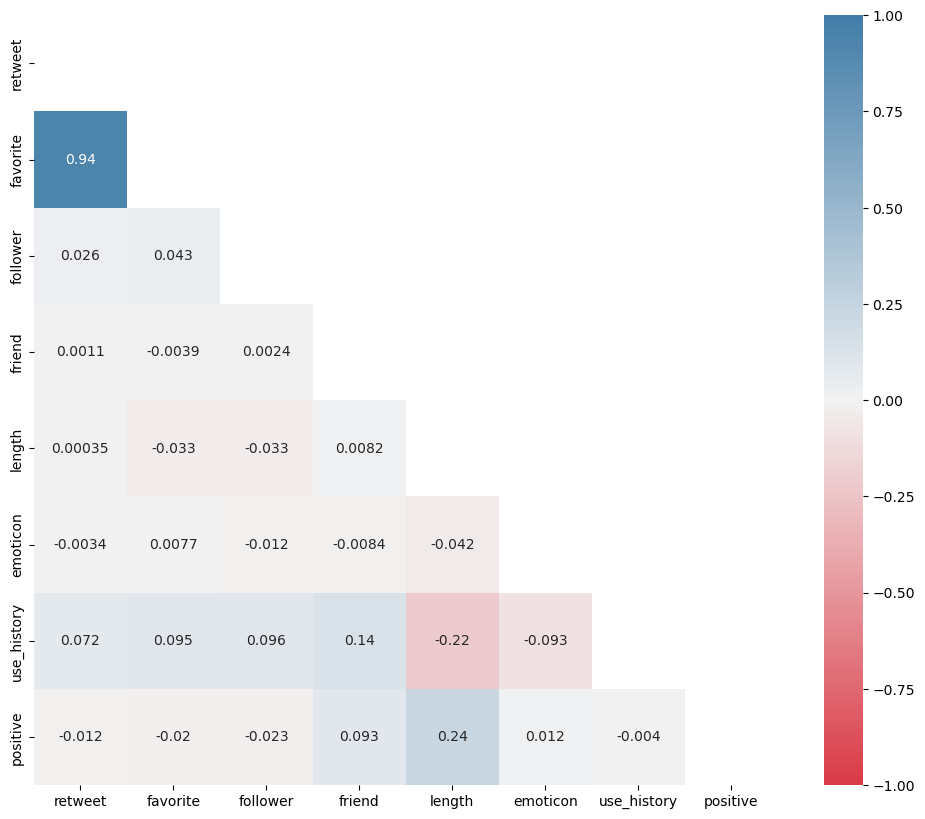

In [26]:
corr = df_stat2[
    [
        "retweet",
        "favorite",
        "follower",
        "friend",
        "length",
        "emoticon",
        "use_history",
        "positive",
    ]
].corr()

fig, ax = plt.subplots(figsize=(12, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(10, 240, as_cmap=True)
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap=cmap, annot=True)
plt.show()

As shown in the heatmap above, based on the tweets about #iPhone14 and #iPhone14Pro, the following correlations are observed:
- The tweets from tweeters with longer history on Twitter are retweeted and favorited more often.
- These tweeters also have more followers and friends but their tweets tend to be shorter and with less emoticons.
- The tweets that contain more "positive" words tend to be longer and are from tweeters with more friends.


In [171]:
# Poisson regression model on the number of retweets

Y = df_stat2[["retweet"]]
X = df_stat2[
    ["favorite", "follower", "friend", "length", "emoticon", "use_history", "positive"]
]
X = sm.add_constant(X)

results = sm.GLM(Y, X, family=sm.families.Poisson()).fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                retweet   No. Observations:                 1826
Model:                            GLM   Df Residuals:                     1818
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4266.9
Date:                Fri, 16 Sep 2022   Deviance:                       7639.0
Time:                        15:32:21   Pearson chi2:                 5.83e+04
No. Iterations:                    11   Pseudo R-squ. (CS):             0.9890
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.9806      0.087    -11.255      

### Summary

Using Poisson regression model on the number of retweets for tweets about #iPhone14 and #iPhone14Pro, the number of retweets increases when the tweets are by tweeters with higher number of followers and longer history of using Twitter. The number also goes up with the use of emoticons in the tweets and the number of favories received by the tweets.